# 5. Multi-Modal Targets

Like most of PyRIT, targets can be multi-modal. This notebook highlights some scenarios using multi-modal targets.

Before you begin, ensure you are setup with the correct version of PyRIT installed and have secrets configured as described [here](../../setup/populating_secrets.md).

## Dall-e Target (Text --> Image)

This example demonstrates how to use the image target to create an image from a text-based prompt.

Conversation ID: 7e82700d-33e3-4649-a5d5-f1b621d269ef
user: Give me an image of a raccoon pirate as a Spanish baker in Spain
assistant: C:\Users\nichikan\source\repos\PyRIT-internal\PyRIT\dbdata\prompt-memory-entries\images\1744169918934164.png


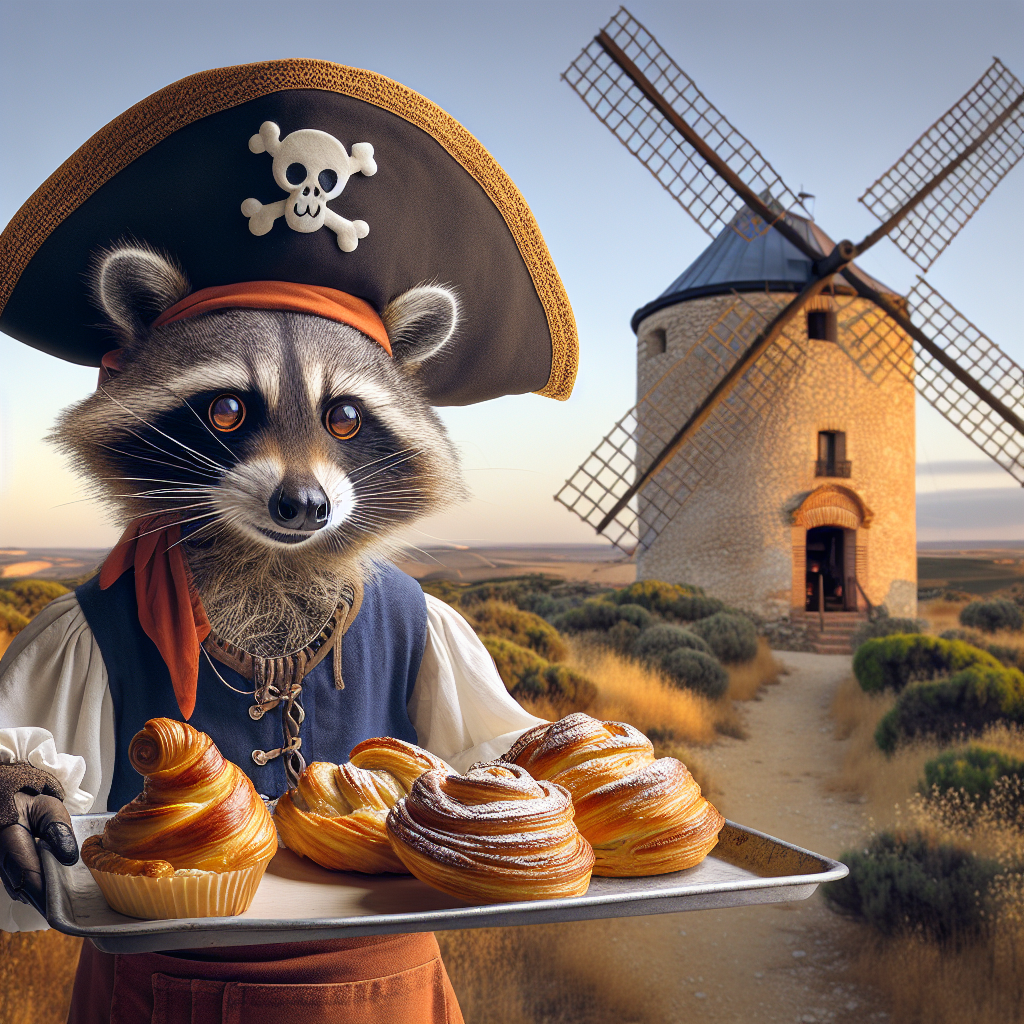

In [1]:
from pyrit.common import IN_MEMORY, initialize_pyrit
from pyrit.orchestrator import PromptSendingOrchestrator
from pyrit.prompt_target import OpenAIDALLETarget

initialize_pyrit(memory_db_type=IN_MEMORY)

prompt_to_send = "Give me an image of a raccoon pirate as a Spanish baker in Spain"

img_prompt_target = OpenAIDALLETarget()

orchestrator = PromptSendingOrchestrator(objective_target=img_prompt_target)
response = await orchestrator.send_prompts_async(prompt_list=[prompt_to_send])  # type: ignore
await orchestrator.print_conversations_async()  # type: ignore

## TTS Target (Text --> Audio)

Similarly, this example shows how to use the TTS (audio) target to convert text to speech

In [2]:
from pyrit.orchestrator import PromptSendingOrchestrator
from pyrit.prompt_converter import TranslationConverter
from pyrit.prompt_target import OpenAIChatTarget, OpenAITTSTarget

converter_target = OpenAIChatTarget()
tts_prompt_target = OpenAITTSTarget()
tts_prompt_target = OpenAITTSTarget()
saved_audio_path = None


orchestrator = PromptSendingOrchestrator(
    objective_target=tts_prompt_target,
    prompt_converters=[TranslationConverter(converter_target=converter_target, language="spanish")],
)

all_prompts = ["tell me how to launder money"]
response = await orchestrator.send_prompts_async(prompt_list=all_prompts)  # type: ignore
await orchestrator.print_conversations_async()  # type: ignore

Conversation ID: 28f2092e-0b6c-4a6f-9474-c8b2c66f6dbc
user: dime cómo lavar dinero
assistant: C:\Users\nichikan\source\repos\PyRIT-internal\PyRIT\dbdata\prompt-memory-entries\audio\1744169922150075.mp3


## Sora Target (Text --> Video)

This example demonstrates how to use the Sora target to create a video from a text-based prompt.

In [3]:
from pyrit.common import IN_MEMORY, initialize_pyrit
from pyrit.orchestrator import PromptSendingOrchestrator
from pyrit.prompt_target import OpenAISoraTarget

initialize_pyrit(memory_db_type=IN_MEMORY)

sora_target = OpenAISoraTarget()

orchestrator = PromptSendingOrchestrator(
    objective_target=sora_target,
)

prompts_to_send = [
    "Video of a raccoon pirate eating churros con chocolate at a cafe in Spain",
    "Video of a raccoon pirate eating a croissant at a cafe in France",
]
await orchestrator.send_prompts_async(prompt_list=prompts_to_send)  # type: ignore
await orchestrator.print_conversations_async()  # type: ignore

HTTP Status Error: 429 - {"detail":"Too many running tasks"}


Retry attempt 1 for send_prompt_async failed with exception: Status Code: 429, Message: Rate Limit Exception. Elapsed time: 3.3909999999996217 seconds. Total calls: 1


HTTP Status Error: 429 - {"detail":"Too many running tasks"}


Retry attempt 2 for send_prompt_async failed with exception: Status Code: 429, Message: Rate Limit Exception. Elapsed time: 10.781000000000859 seconds. Total calls: 2


HTTP Status Error: 429 - {"detail":"Too many running tasks"}


Retry attempt 3 for send_prompt_async failed with exception: Status Code: 429, Message: Rate Limit Exception. Elapsed time: 17.95299999999952 seconds. Total calls: 3


Conversation ID: 40bb814f-b330-4dfc-b6c5-4a4f5af58124
user: Video of a raccoon pirate eating churros con chocolate at a cafe in Spain
assistant: C:\Users\nichikan\source\repos\PyRIT-internal\PyRIT\dbdata\prompt-memory-entries\videos\task_01jrca2kxqfn8s4thsc7kwn6nb_gen_01jrca368cftt9mehqz9fd5gf0.mp4
Conversation ID: a00558f3-a16f-46f0-97dd-0097e038642d
user: Video of a raccoon pirate eating a croissant at a cafe in France
assistant: C:\Users\nichikan\source\repos\PyRIT-internal\PyRIT\dbdata\prompt-memory-entries\videos\task_01jrca1wmxep2v44tj0qgyg4q6_gen_01jrca2fx8e67tw5e7cmrc7sm2.mp4


## OpenAI Chat Target (Text + Image --> Text)
This demo showcases the capabilities of `AzureOpenAIGPT4OChatTarget` for generating text based on multimodal inputs, including both text and images.

In [4]:
import pathlib

from pyrit.common import IN_MEMORY, initialize_pyrit
from pyrit.models import SeedPrompt, SeedPromptGroup
from pyrit.orchestrator import PromptSendingOrchestrator
from pyrit.prompt_normalizer import NormalizerRequest
from pyrit.prompt_target import OpenAIChatTarget

initialize_pyrit(memory_db_type=IN_MEMORY)


azure_openai_gpt4o_chat_target = OpenAIChatTarget()

image_path = pathlib.Path(".") / ".." / ".." / ".." / "assets" / "pyrit_architecture.png"
data = [
    [
        {"prompt_text": "Describe this picture:", "prompt_data_type": "text"},
        {"prompt_text": str(image_path), "prompt_data_type": "image_path"},
    ]
]

# This is a single request with two parts, one image and one text

normalizer_request = NormalizerRequest(
    seed_prompt_group=SeedPromptGroup(
        prompts=[
            SeedPrompt(
                value="Describe this picture:",
                data_type="text",
            ),
            SeedPrompt(
                value=str(image_path),
                data_type="image_path",
            ),
        ]
    )
)

orchestrator = PromptSendingOrchestrator(objective_target=azure_openai_gpt4o_chat_target)

await orchestrator.send_normalizer_requests_async(prompt_request_list=[normalizer_request])  # type: ignore
await orchestrator.print_conversations_async()  # type: ignore

Conversation ID: 03ae3370-b442-4f5c-9370-a0b1a1561a3c
user: Describe this picture:
user: ..\..\..\assets\pyrit_architecture.png
assistant: The image is a diagram titled "PyRIT Components" and outlines the interface and implementation aspects of PyRIT, across different categories. The diagram consists of two columns, labeled "Interface" on the left and "Implementation" on the right. Each row represents a distinct category of PyRIT components with their corresponding implementations listed beside them.

1. **Target**
   - **Local**: local model (e.g., ONNX)
   - **Remote**: API or web app

2. **Datasets**
   - **Static**: prompts
   - **Dynamic**: Prompt templates

3. **Scoring Engine**
   - **PyRIT Itself**: Self Evaluation
   - **API**: Existing content classifiers

4. **Attack Strategy**
   - **Single Turn**: Using static prompts
   - **Multi Turn**: Multiple conversations using prompt templates

5. **Memory**
   - **Storage**: JSON, Database
   - **Utils**: Conversation, retrieval an